<a href="https://colab.research.google.com/github/sierraperezdavid31/CIS9650-DC-Sales/blob/main/Group_Project_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Washington DC Real Estate Sales

**Group 15 - Project 7**

**Team**
* Nusrat Akter
* Paven Oommen
* David Sierra Perez
* Katherine Terrell

December 15, 2025

# Executive Summary

The Executive Summary will go here

# Table of Contents
1. Introduction
2. Problem Statement
3. Data Description
4. Loading Data into Google Colab
5. Data Cleaning/Preperation
6. Data Analysis
7. Discussion & Results
8. References

# Introduction

Introduction goes here

# Problem Statement

The problem statement will go here

# Data Description

Data Description goes here

# Loading Data into Google Colab

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change the option to show the max amount of columns and rows
# Reference: https://bobbyhadz.com/blog/pandas-dataframe-set-number-of-max-rows
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# Getting the csv from google cloud
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# The URL from Google Colab
url = "https://storage.googleapis.com/msba-online-data/CIS9650/Project%2007/DC.csv"

# Read the URL into a Dataframe
df = pd.read_csv(url)

# Data Cleaning/Preperation

In [3]:
# We are going to see the first 5 rows of data to see if it loaded properly
df.head(5)

,state,property_zip5,property_street_address,property_city,property_county,property_id,sale_datetime,property_type,sale_price,seller_1_name,buyer_1_name,building_num_units,building_year_built,source_url,book,page,transfer_deed_type,property_township,property_lat,property_lon,sale_id,deed_date,building_num_stories,building_num_beds,building_num_baths,building_area_sqft,building_assessed_value,building_assessed_date,land_area_acres,land_area_sqft,land_assessed_value,seller_2_name,buyer_2_name,land_assessed_date,seller_1_state,seller_2_state,buyer_1_state,buyer_2_state,total_assessed_value,total_appraised_value,land_appraised_value,building_appraised_value,land_type
0,DC,20002.0,1 14TH ST NE # 1,WASHINGTON,WASHINGTON,285723.0,2013-10-24 00:00:00,NaN,399999,NaN,"RAOL, NEAHA P",NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DC,20002.0,1 16TH ST NE,WASHINGTON,WASHINGTON,75999.0,2021-04-08 00:00:00,NaN,900000,NaN,"THURLOW, CHRISTOPHER",NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DC,20003.0,1 18TH ST SE # 101,WASHINGTON,WASHINGTON,76000.0,2003-04-28 00:00:00,NaN,200399,NaN,"O'HARA, MATTHEW E",NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DC,20003.0,1 18TH ST SE # 102,WASHINGTON,WASHINGTON,76000.0,2020-11-24 00:00:00,NaN,0,NaN,CRYSTAL L BRIDGEMAN TRUSTEE,NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DC,20003.0,1 18TH ST SE # 103,WASHINGTON,WASHINGTON,76000.0,2003-01-28 00:00:00,NaN,191050,NaN,"SMITH, GENE",NaN,NaN,https://opendata.dc.gov/datasets/integrated-ta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# We will be using the info() function to learn more about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162846 entries, 0 to 162845
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   state                     162846 non-null  object 
 1   property_zip5             158895 non-null  float64
 2   property_street_address   162846 non-null  object 
 3   property_city             162846 non-null  object 
 4   property_county           162846 non-null  object 
 5   property_id               141273 non-null  float64
 6   sale_datetime             162846 non-null  object 
 7   property_type             0 non-null       float64
 8   sale_price                162846 non-null  int64  
 9   seller_1_name             0 non-null       float64
 10  buyer_1_name              162846 non-null  object 
 11  building_num_units        0 non-null       float64
 12  building_year_built       0 non-null       float64
 13  source_url                162846 non-null  o

In [5]:
# From the info we learned that some columns are complety empty. That means they are useless.
# We will drop those columns from the data frame by using a for loop

# df.columns gives a list of the columns. We will loop through it
for col in df.columns:

  # If the column count is 0 then we will remove the column
  if df[col].count() == 0:
    df.drop(columns = col, inplace = True)

In [6]:
# Using the unique() function we will see how many unique values appear per column
for col in df.columns:
  print(f"Column Name: {col}")
  print(f"Unique Values: {len(df[col].unique())}")
  print(df[col].unique())
  print()

Column Name: state
Unique Values: 1
['DC']

Column Name: property_zip5
Unique Values: 51
[20002. 20003. 20019. 20001.    nan 20011. 20036. 20017. 20005. 20024.
 20007. 20037. 20012. 20032. 20008. 20020. 20015. 20004. 20010. 20018.
 20009. 20071. 20590. 20542. 20237. 20530. 20548. 20045. 20006. 98109.
 20536. 20852. 20427. 20260. 20059. 20016. 20226. 76310. 20319. 20546.
 22003. 20057. 20472. 20532. 20715. 20052. 20429. 20049. 20421. 20571.
 20463.]

Column Name: property_street_address
Unique Values: 160278
['1 14TH ST NE # 1' '1 16TH ST NE' '1 18TH ST SE # 101' ...
 'WYOMING AVE NW' 'XENIA ST SE' 'YORKTOWN RD NW']

Column Name: property_city
Unique Values: 1
['WASHINGTON']

Column Name: property_county
Unique Values: 1
['WASHINGTON']

Column Name: property_id
Unique Values: 95212
[285723.  75999.  76000. ...  59573.  43135. 258563.]

Column Name: sale_datetime
Unique Values: 7012
['2013-10-24 00:00:00' '2021-04-08 00:00:00' '2003-04-28 00:00:00' ...
 '1995-05-24 00:00:00' '1993-12-30 

In [7]:
# We are noticing that columns named state, property_city, property_state, source url are all 1 value.
# We will remove them but take note of them

# State = "DC"
# Property_city = "Washington"
# Property_State = "Washington"
# Source_url = "https://opendata.dc.gov/datasets/integrated-tax-system-public-extract-property-sales"

# Remove the column with 1 unique values.
for col in df.columns:

  # if the unique value list has a length of 1, we will drop it
  if len(df[col].unique()) == 1:
    df.drop(columns = col, inplace = True)

In [8]:
# We will check the dataframe summary again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162846 entries, 0 to 162845
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   property_zip5            158895 non-null  float64
 1   property_street_address  162846 non-null  object 
 2   property_id              141273 non-null  float64
 3   sale_datetime            162846 non-null  object 
 4   sale_price               162846 non-null  int64  
 5   buyer_1_name             162846 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 7.5+ MB


In [9]:
# We notice that the sale_price is in a objject data type
# We will convert it to a datetime value
df['sale_datetime'] = pd.to_datetime(df['sale_datetime'])

# renaming a column to accuretly represent the data with the changes we made
df.rename(columns = {"sale_datetime": "sale_date"}, inplace = True)

# We also noticed that the property zip is a float value. We will get rid of this by turning it into an integer
# We got alot of error and it turned out we needed to get rid of the null values.
# We decided as a team to make the null zipcodes to 0 then convert it to an int
df['property_zip5'] = df['property_zip5'].fillna(0)
df['property_zip5'] = df['property_zip5'].astype(int)

# We will be adding 3 columns to the data frame
# Year column to get the year of sale
# Month column to get the month of sale
# Day column to get the day of the month

df['year'] = df['sale_date'].dt.year
df['month'] = df['sale_date'].dt.month
df['day'] = df['sale_date'].dt.day
df['month_name'] = df['sale_date'].dt.month_name()

In [10]:
# Looking at the data 1 more time with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162846 entries, 0 to 162845
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   property_zip5            162846 non-null  int64         
 1   property_street_address  162846 non-null  object        
 2   property_id              141273 non-null  float64       
 3   sale_date                162846 non-null  datetime64[ns]
 4   sale_price               162846 non-null  int64         
 5   buyer_1_name             162846 non-null  object        
 6   year                     162846 non-null  int32         
 7   month                    162846 non-null  int32         
 8   day                      162846 non-null  int32         
 9   month_name               162846 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(3)
memory usage: 10.6+ MB


In [11]:
# Looking at the data we see that some sale price is 0
# That is not good
# We have decided to only look at data with a sale price greater than 0
new_df = df[df['sale_price'] != 0]

new_df.head()

,property_zip5,property_street_address,property_id,sale_date,sale_price,buyer_1_name,year,month,day,month_name
0,20002,1 14TH ST NE # 1,285723.0,2013-10-24,399999,"RAOL, NEAHA P",2013,10,24,October
1,20002,1 16TH ST NE,75999.0,2021-04-08,900000,"THURLOW, CHRISTOPHER",2021,4,8,April
2,20003,1 18TH ST SE # 101,76000.0,2003-04-28,200399,"O'HARA, MATTHEW E",2003,4,28,April
4,20003,1 18TH ST SE # 103,76000.0,2003-01-28,191050,"SMITH, GENE",2003,1,28,January
5,20003,1 18TH ST SE # 104,76000.0,2015-03-24,390000,"LIN, CHIENJU",2015,3,24,March


# Data Analysis


In [12]:
# Map
# Nus

In [13]:
# Zipcode Sale Breakdown
# Paven

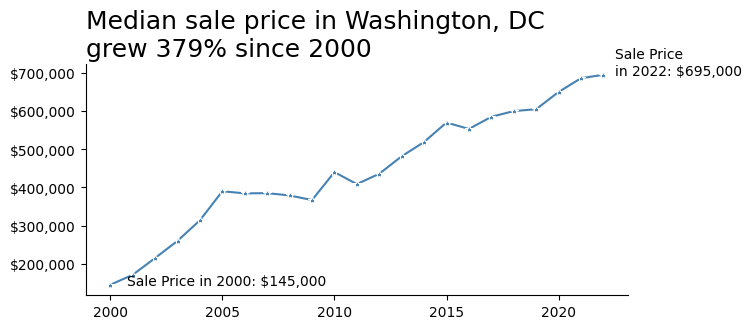

In [14]:
# Sale Date breakdown by Year
# David

# Aggregate the data
new_df = new_df[new_df['year'] >= 2000]
salebyyear = new_df.groupby(['year'])['sale_price'].median().reset_index()


# Plotting the data
fig, ax = plt.subplots(figsize = (7,3))
sns.despine()

# Creating the line plot
ax = sns.lineplot(data = salebyyear, x = 'year', y = 'sale_price', marker = "*", color = "steelblue")

# Custumizing the graphs
ax.set_title("Median sale price in Washington, DC\ngrew 379% since 2000", loc = "Left", fontdict = {'fontsize': 18})
ax.set_xlabel('')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_ylabel('')
plt.rc('font', size = 10)

# Labeling Labels
# https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
for x, y in zip(salebyyear['year'], salebyyear['sale_price']):
  if x == 2000:
    plt.text(x = x + .75, # x-coordinate position of data label
    y = y - .5, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = f"Sale Price in {x}: ${y:,.0f}", # data label, formatted to ignore decimals
    color = "black",
    fontsize = 10,
    )
  elif x == 2022:
    plt.text(x = x + .5, # x-coordinate position of data label
    y = y - 1, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = f"Sale Price\nin {x}: ${y:,.0f}", # data label, formatted to ignore decimals
    color = "black",
    fontsize = 10,
    )


# Show graph
plt.show()

# Notable Observation
# Median Sale Price grew 379% since 2000.
# That is an average of 7.5% increase per year

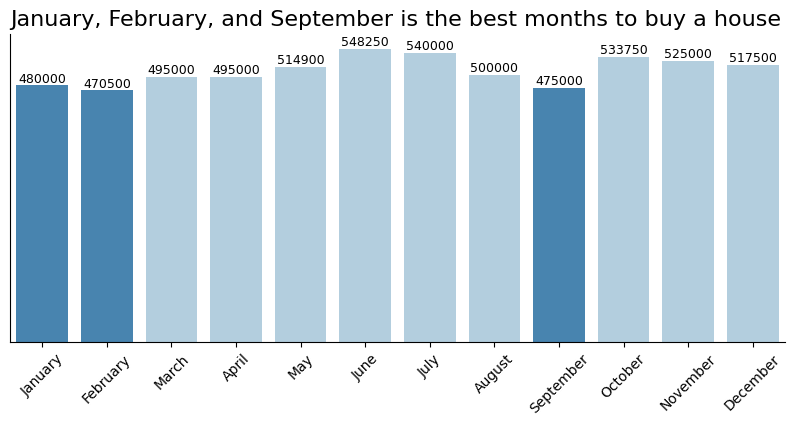

In [15]:
# Sale Date breakdown by Day, Month, Year
# David

# Aggregate the data
new_df = new_df[new_df['year'] >= 2000]
salebymonth = new_df.groupby(['month_name','month'])['sale_price'].median().reset_index()

# find the lowest sale price month
bottom_3_months = list(salebymonth['sale_price'].nsmallest(3))

# Creating a new column called lowest to find the lowest price months
salebymonth['lowest'] = salebymonth['sale_price'].apply(lambda x: True if x in bottom_3_months else False)
salebymonth = salebymonth.sort_values(by = 'month')

# Plotting the data
fig, ax = plt.subplots(figsize = (10,4))
sns.despine()

# crreating the line plot
ax = sns.barplot(data = salebymonth, x = 'month_name', y = 'sale_price', hue = 'lowest', palette = "Blues")

# Customization
ax.set_title('January, February, and September is the best months to buy a house', loc = "left", fontsize = 16)
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.xticks(rotation = 45)
ax.get_yaxis().set_visible(False)
ax.get_legend().remove()
plt.rc('font', size = 9)

# Labeling Labels
for container in ax.containers:
    ax.bar_label(container)

# Display Barchart
plt.show()

# Possible reasons for January and February having low prices is many people living in DC are working with the government
# In January many administrations start and people leave Washington to other places
# More people put their house on sale due to changing administration

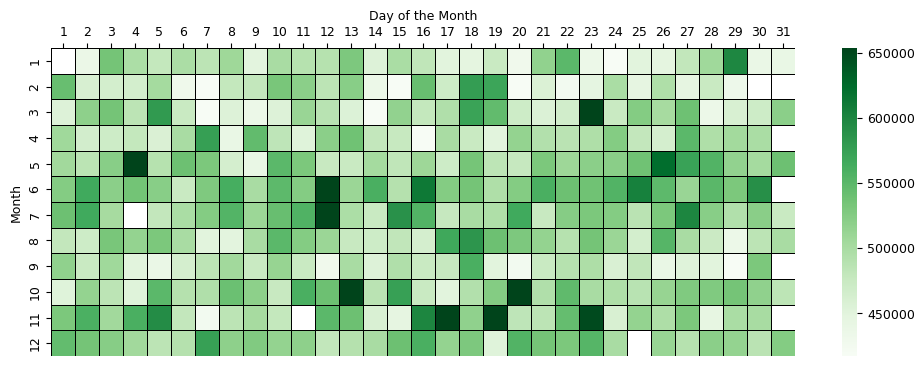

In [16]:
# Best day of the year to buy a home
new_df = new_df[new_df['year'] >= 2000]

# Aggregatingh the data to a pivot table
salebymonthday = pd.pivot_table(new_df, values = 'sale_price', index = 'month', columns = 'day', aggfunc = 'median')

# Creating the visual
fig, ax = plt.subplots(figsize = (12,4))

# Plotting the heatmap
ax = sns.heatmap(salebymonthday,  cmap = "Greens", linewidths = .5, linecolor = 'black', robust = True)

# Customizing the heatmap
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Month')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


# Show Chart
plt.show()

# Key Observations
# No sales were made on New Year Day, Christmas, Veteran Day, and the Forth of July
#

In [17]:
# Median Sale price over time (all)
# Number of properties sold
# Katherine

# Discussion & Results

# References

In [18]:
#https://seaborn.pydata.org/